# Urbanization & Climate Impact on Crop Yields 

### This notebook analyzes how urbanization affects local climate paterns, specifically focusing on rainfall changes and their impact on crop yields over the next decade. 

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set vizualitation style
plt.style.use('seaborn')
sns.set_palette("husl")

#Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)

## Data Loading & Data Exploration

#### Load Urbanization and crop yield datasets, later then we'll do data exploration to understand our dataset

In [3]:
urbanization_df = pd.read_csv("urbanization.csv")
urbanization_df

,country,country_code,year,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf
0,Aruba,ABW,1960,54922.0,NaN,NaN,50.776000,49.224000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,130072080.0,NaN,2.421063e+10,14.576676,85.423324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1960,9035043.0,NaN,NaN,8.401000,91.599000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1960,97630925.0,NaN,1.190495e+10,14.710006,85.289994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,1960,5231654.0,NaN,NaN,10.435000,89.565000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,Kosovo,XKX,2023,1756366.0,NaN,1.046822e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17020,"Yemen, Rep.",YEM,2023,39390799.0,NaN,NaN,39.831000,60.169000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17021,South Africa,ZAF,2023,63212384.0,NaN,3.806993e+11,68.819000,31.181000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17022,Zambia,ZMB,2023,20723965.0,NaN,2.757796e+10,46.335000,53.665000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
crop_yield_df = pd.read_csv("yield_df.csv")
crop_yield_df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [5]:
urbanization_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   17024 non-null  object 
 1   country_code              17024 non-null  object 
 2   year                      17024 non-null  int64  
 3   total_pop                 16930 non-null  float64
 4   pop_dens_sq_km            15076 non-null  float64
 5   gdp                       14307 non-null  float64
 6   urban_pop_perc            16832 non-null  float64
 7   rural_pop_perc            16832 non-null  float64
 8   elect_access_pop          7611 non-null   float64
 9   internet_use_pop          8320 non-null   float64
 10  basic_sanitation_pop      5890 non-null   float64
 11  safe_sanitation_pop       4106 non-null   float64
 12  energy_kg_oil_eq_cap      7970 non-null   float64
 13  ren_energy_cons_perc      8234 non-null   float64
 14  clean_

In [6]:
crop_yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [7]:
# Statistical Summary - Urbanization DF
urbanization_df.describe()

,year,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf
count,17024.000000,1.693000e+04,15076.000000,1.430700e+04,16832.000000,16832.000000,7611.000000,8320.000000,5890.000000,4106.000000,7970.000000,8234.000000,5451.000000,13283.000000
mean,1991.500000,2.166063e+08,295.310568,1.184721e+12,50.370201,49.629799,81.045996,25.897848,72.751307,51.795401,2171.117216,31.251194,62.463025,844.640599
std,18.473496,7.115083e+08,1503.385874,5.489324e+12,24.770576,24.770576,28.546117,30.631363,28.778414,29.809868,2784.478922,29.694407,38.192727,2988.217583
min,1960.000000,2.715000e+03,0.098625,2.585956e+06,2.077000,0.000000,0.533899,0.000000,2.793897,0.000000,9.727288,0.000000,0.000000,0.000000
25%,1975.750000,1.009540e+06,21.388095,2.293505e+09,30.088547,30.287777,69.653940,0.283144,49.537175,24.833676,537.545175,5.400000,22.600000,1.334350
50%,1991.500000,6.748606e+06,55.830156,1.692109e+10,48.920000,51.080000,98.400000,9.928821,85.375468,48.018238,1063.780892,21.500000,79.000000,16.860600
75%,2007.250000,4.678519e+07,137.490685,2.013025e+11,69.712223,69.911453,100.000000,48.570000,97.437141,80.973572,2893.715937,54.100000,100.000000,180.512500
max,2023.000000,8.061876e+09,21530.000000,1.061717e+14,100.000000,97.923000,100.000000,100.000000,100.000000,100.000000,40710.112176,98.300000,100.000000,38521.997856


In [8]:
# Statistical Summary - Crop Yield DF
crop_yield_df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [9]:
# Missing Values
# Identify and visualise missing data patterns

# 1. Urbanziation Data
urbanization_df.isnull().sum()

country                         0
country_code                    0
year                            0
total_pop                      94
pop_dens_sq_km               1948
gdp                          2717
urban_pop_perc                192
rural_pop_perc                192
elect_access_pop             9413
internet_use_pop             8704
basic_sanitation_pop        11134
safe_sanitation_pop         12918
energy_kg_oil_eq_cap         9054
ren_energy_cons_perc         8790
clean_fuel_tech_cook_pop    11573
co2_emiss_excl_lulucf        3741
dtype: int64

In [10]:
# 2. Crop Yield Data
crop_yield_df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

### Based on the data above,  we can see that there are some missing values in Urbanization DF and no missing values in Crop Yield DF. We'll handle this missing values later. 

# Data Preprocessing 

### Clean and prepare data for analysis 

In [11]:
# Create copies for preprocessing

urban_clean = urbanization_df.copy()
crop_clean = crop_yield_df.copy()

In [12]:
# Rename columns for consistency (remove spaces,lowercase)
urban_clean.columns = urban_clean.columns.str.strip().str.lower().str.replace(' ', '_')
crop_clean.columns = crop_clean.columns.str.strip().str.lower().str.replace(' ','_')

In [13]:
# Drop the unnamed index column if it exists

crop_clean = crop_clean.drop('unnamed:_0',axis=1)

In [14]:
# Handle Missing Values in Key Columns
# For numerical columns, fill with median

numerical_cols_urban = urban_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols_urban :
    if urban_clean[col].isnull().sum() > 0 :
        urban_clean[col].fillna(urban_clean[col].median(), inplace=True)

In [15]:
# Check for duplicates

urban_clean.duplicated().sum()

0

In [16]:
crop_clean.duplicated().sum()

2310

#### There's duplicated rows in Crop Yield Data, so we need to drop duplicates 

In [17]:
crop_clean = crop_clean.drop_duplicates()

In [18]:
urban_clean.dtypes

country                      object
country_code                 object
year                          int64
total_pop                   float64
pop_dens_sq_km              float64
gdp                         float64
urban_pop_perc              float64
rural_pop_perc              float64
elect_access_pop            float64
internet_use_pop            float64
basic_sanitation_pop        float64
safe_sanitation_pop         float64
energy_kg_oil_eq_cap        float64
ren_energy_cons_perc        float64
clean_fuel_tech_cook_pop    float64
co2_emiss_excl_lulucf       float64
dtype: object

In [19]:
crop_clean.dtypes

area                              object
item                              object
year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

### Data Integrion
#### Merge urbanization and crop yield dataset for analysis

In [20]:
# Standarize country/area names for merging
# Check unique countries/areas

print("Sample countries in Urbanization Data:")
urban_clean['country'].unique()

Sample countries in Urbanization Data:


array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [21]:
print("Sample countries in Crop Yield Data:")
crop_clean['area'].unique()

Sample countries in Crop Yield Data:


array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [22]:
# Create a mapping key -- we'll merge on country/area and year
# Rename 'area' to 'country' in crop data for consistency

crop_clean = crop_clean.rename(columns={'area': 'country'})

In [23]:
# Filter for overlapping years

overlap_start = max(urban_clean['year'].min(), crop_clean['year'].min())
overlap_end = min(urban_clean['year'].max(), crop_clean['year'].max())

In [24]:
# Filter data for overlapping years ( overlap_start - overlap_end)

urban_filtered = urban_clean[(urban_clean['year']>= overlap_start) &
                            urban_clean['year']<= overlap_end].copy()

crop_filtered = crop_clean[(crop_clean['year']>= overlap_start) &
                            crop_clean['year']<= overlap_end].copy()

In [25]:
# Merge Dataset
# We'll do a leftjoin to keep all crop yield recordsand match with urbanization data 

merged_df = crop_filtered.merge(urban_filtered, on =['country','year'], how = 'inner', suffixes=('_crop','_urban'))

In [26]:
merged_df

,country,item,year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,country_code,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf
0,Albania,Maize,1990,36613,1485.0,121.00,16.37,ALB,3286542.0,119.946788,2.028554e+09,36.428,63.572,100.0,0.0,85.375468,48.018238,813.255696,25.5,79.0,6.6474
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37,ALB,3286542.0,119.946788,2.028554e+09,36.428,63.572,100.0,0.0,85.375468,48.018238,813.255696,25.5,79.0,6.6474
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37,ALB,3286542.0,119.946788,2.028554e+09,36.428,63.572,100.0,0.0,85.375468,48.018238,813.255696,25.5,79.0,6.6474
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37,ALB,3286542.0,119.946788,2.028554e+09,36.428,63.572,100.0,0.0,85.375468,48.018238,813.255696,25.5,79.0,6.6474
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37,ALB,3286542.0,119.946788,2.028554e+09,36.428,63.572,100.0,0.0,85.375468,48.018238,813.255696,25.5,79.0,6.6474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24913,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76,ZWE,14013808.0,36.225431,1.909102e+10,32.654,67.346,40.6,15.5,39.319720,30.074670,805.339134,79.3,30.0,12.7678
24914,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76,ZWE,14013808.0,36.225431,1.909102e+10,32.654,67.346,40.6,15.5,39.319720,30.074670,805.339134,79.3,30.0,12.7678
24915,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76,ZWE,14013808.0,36.225431,1.909102e+10,32.654,67.346,40.6,15.5,39.319720,30.074670,805.339134,79.3,30.0,12.7678
24916,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76,ZWE,14013808.0,36.225431,1.909102e+10,32.654,67.346,40.6,15.5,39.319720,30.074670,805.339134,79.3,30.0,12.7678


In [27]:
merged_df.columns

Index(['country', 'item', 'year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp',
       'country_code', 'total_pop', 'pop_dens_sq_km', 'gdp', 'urban_pop_perc',
       'rural_pop_perc', 'elect_access_pop', 'internet_use_pop',
       'basic_sanitation_pop', 'safe_sanitation_pop', 'energy_kg_oil_eq_cap',
       'ren_energy_cons_perc', 'clean_fuel_tech_cook_pop',
       'co2_emiss_excl_lulucf'],
      dtype='object')

In [28]:
merged_df['country'].nunique()

98

In [29]:
merged_df['year'].nunique()

23

In [30]:
print("Year range:")
print(merged_df['year'].min())
merged_df['year'].max()

Year range:
1990


2013

## Feature Engineering 

In [31]:
# Create additional features on analysis 

#Create a copy for feature engineering
df_features = merged_df.copy()

In [32]:
# 1. Calculate urbanization rate of change
df_features = df_features.sort_values(['country','year'])
df_features['urban_pop_change'] = df_features.groupby('country')['urban_pop_perc'].diff()

In [33]:
# 2. Create decade bins
df_features['decade'] = (df_features['year']//10)* 10

In [34]:
# 3. Categorize urbanization level

df_features['urbanization_level']= pd.cut(
df_features['urban_pop_perc'],
bins=[0,30,50,70,100],
labels=['Low (<30%)','Medium (30-50%)','High(50-70%)','Very High(>70%)'])

In [35]:
#4.Create yield categories

df_features['yield_category']= pd.qcut(
df_features['hg/ha_yield'],
q=4,
labels=['Low','Medium-Low','Medium-High','Very High'],
duplicates='drop')

In [36]:
# 5. Calculate yield efficiency (yield per mm of rainfall)

df_features['yield_per_rainfall']=df_features['hg/ha_yield']/(df_features['average_rain_fall_mm_per_year']+1)

In [37]:
# 6. Categorize Temperature level

df_features['temp_category']= pd.cut(
df_features['avg_temp'],
bins=[-np.inf, 10, 20, 30, np.inf],
labels=['Cold (<30C)','Moderate (10-20C)','Warm(20-30C)','Hot(>70C)'])

In [38]:
df_features

,country,item,year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,country_code,total_pop,pop_dens_sq_km,gdp,urban_pop_perc,rural_pop_perc,elect_access_pop,internet_use_pop,basic_sanitation_pop,safe_sanitation_pop,energy_kg_oil_eq_cap,ren_energy_cons_perc,clean_fuel_tech_cook_pop,co2_emiss_excl_lulucf,urban_pop_change,decade,urbanization_level,yield_category,yield_per_rainfall,temp_category
0,Albania,Maize,1990,36613,1485.0,121.00,16.37,ALB,3286542.0,119.946788,2.028554e+09,36.428,63.572,100.0,0.0,85.375468,48.018238,813.255696,25.5,79.0,6.6474,NaN,1990,Medium (30-50%),Medium-Low,24.638627,Moderate (10-20C)
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37,ALB,3286542.0,119.946788,2.028554e+09,36.428,63.572,100.0,0.0,85.375468,48.018238,813.255696,25.5,79.0,6.6474,0.0,1990,Medium (30-50%),Medium-High,44.863392,Moderate (10-20C)
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37,ALB,3286542.0,119.946788,2.028554e+09,36.428,63.572,100.0,0.0,85.375468,48.018238,813.255696,25.5,79.0,6.6474,0.0,1990,Medium (30-50%),Medium-Low,15.701884,Moderate (10-20C)
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37,ALB,3286542.0,119.946788,2.028554e+09,36.428,63.572,100.0,0.0,85.375468,48.018238,813.255696,25.5,79.0,6.6474,0.0,1990,Medium (30-50%),Low,8.411844,Moderate (10-20C)
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37,ALB,3286542.0,119.946788,2.028554e+09,36.428,63.572,100.0,0.0,85.375468,48.018238,813.255696,25.5,79.0,6.6474,0.0,1990,Medium (30-50%),Low,4.710633,Moderate (10-20C)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24913,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76,ZWE,14013808.0,36.225431,1.909102e+10,32.654,67.346,40.6,15.5,39.319720,30.074670,805.339134,79.3,30.0,12.7678,0.0,2010,Medium (30-50%),Medium-Low,34.317629,Moderate (10-20C)
24914,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76,ZWE,14013808.0,36.225431,1.909102e+10,32.654,67.346,40.6,15.5,39.319720,30.074670,805.339134,79.3,30.0,12.7678,0.0,2010,Medium (30-50%),Low,4.659574,Moderate (10-20C)
24915,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76,ZWE,14013808.0,36.225431,1.909102e+10,32.654,67.346,40.6,15.5,39.319720,30.074670,805.339134,79.3,30.0,12.7678,0.0,2010,Medium (30-50%),Low,19.972644,Moderate (10-20C)
24916,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76,ZWE,14013808.0,36.225431,1.909102e+10,32.654,67.346,40.6,15.5,39.319720,30.074670,805.339134,79.3,30.0,12.7678,0.0,2010,Medium (30-50%),Medium-Low,33.772036,Moderate (10-20C)


## Vizualisation 

### 1. Urbanization Trend Analysis
#### Visualize how urbanization has evolved over time

Text(0.5, 0, 'Urban Population (%)')

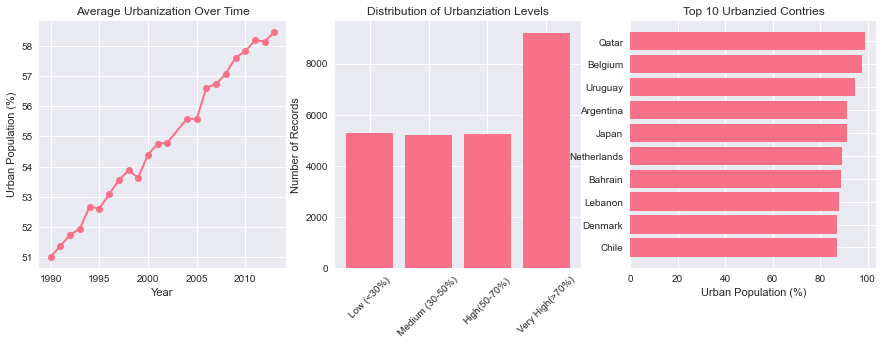

In [39]:
# Create figure with subplots 
fig = plt.figure(figsize=(15,10))

#1. Global Urbanization trend over time
ax1 = plt.subplot(2,3,1)
yearly_urban = df_features.groupby('year')['urban_pop_perc'].mean()
ax1.plot(yearly_urban.index, yearly_urban.values, marker='o',linewidth=2)
ax1.set_title("Average Urbanization Over Time")
ax1.set_xlabel('Year')
ax1.set_ylabel("Urban Population (%)")
ax1.grid(True)

#2. Distribution of urbanization levels
ax2 = plt.subplot(2,3,2)
urban_dist = df_features['urbanization_level'].value_counts().sort_index()
ax2.bar(urban_dist.index, urban_dist.values)
ax2.set_title("Distribution of Urbanziation Levels")
ax2.set_ylabel('Number of Records')
ax2.tick_params(axis='x',rotation=45)

#3. Top 10 Most Urbanized contries (latest year)
ax3 = plt.subplot(2,3,3)
latest_year = df_features['year'].max()
top_urbanized = df_features[df_features['year']==latest_year].groupby('country')['urban_pop_perc'].mean().sort_values(ascending=True).tail(10)
ax3.barh(top_urbanized.index, top_urbanized.values)
ax3.set_title("Top 10 Urbanzied Contries")
ax3.set_xlabel('Urban Population (%)')



### Based on the vizualitations above, most countries are already urbanized. And it increases over time. And the level of distribution of urbanization levels fall most on Very High which is almost 70%. And Qatar is the most urbanized country, followed by Belgium, Uruguay and Argentina.

# 2. Rainfall and Climate Pattern Analysis
#### Analyze and visualize trends and their relationship with urbanization

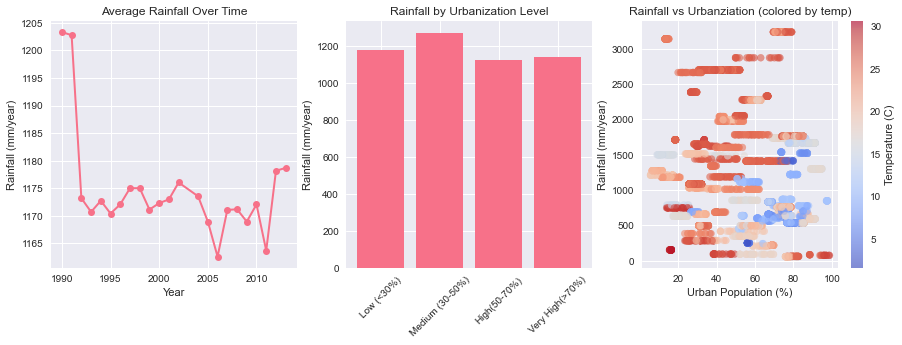

In [40]:
# Create figure with subplots 
fig = plt.figure(figsize=(15,10))

#1. Average rainfall over time
ax1 = plt.subplot(2,3,1)
yearly_rainfall = df_features.groupby('year')['average_rain_fall_mm_per_year'].mean()
ax1.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o',linewidth=2)
ax1.set_title("Average Rainfall Over Time")
ax1.set_xlabel('Year')
ax1.set_ylabel("Rainfall (mm/year)")
ax1.grid(True)

#2. Distribution of rainfall urbanization levels
ax2 = plt.subplot(2,3,2)
rainfall_by_urban = df_features.groupby('urbanization_level')['average_rain_fall_mm_per_year'].mean().sort_index()
ax2.bar(rainfall_by_urban.index, rainfall_by_urban.values)
ax2.set_title("Rainfall by Urbanization Level")
ax2.set_ylabel('Rainfall (mm/year)')
ax2.tick_params(axis='x',rotation=45)

#3 Rainfall vs Urbanziation Scatter Plot
ax5 = plt.subplot(2,3,3)
sample_data = df_features.sample(n=min(5000, len(df_features)),random_state=42)
scatter = ax5.scatter(sample_data['urban_pop_perc'],
                     sample_data['average_rain_fall_mm_per_year'],
                     c=sample_data['avg_temp'], cmap='coolwarm', alpha=0.6)
ax5.set_title("Rainfall vs Urbanziation (colored by temp)")
ax5.set_xlabel('Urban Population (%)')
ax5.set_ylabel("Rainfall (mm/year)")
ax5.grid(True)
plt.colorbar(scatter, ax=ax5, label='Temperature (C)')

### Rainfall stays stable over time, the average global doesnt really change which stays around 1200 mm per year.  Rainfall is higher in medium-organzied country while high-urbanzied ones tend to have lower rainfall.

# 3. Crop Yield Analysis
#### Analyze and visualize crop yields and their relationship with climate and urbanization

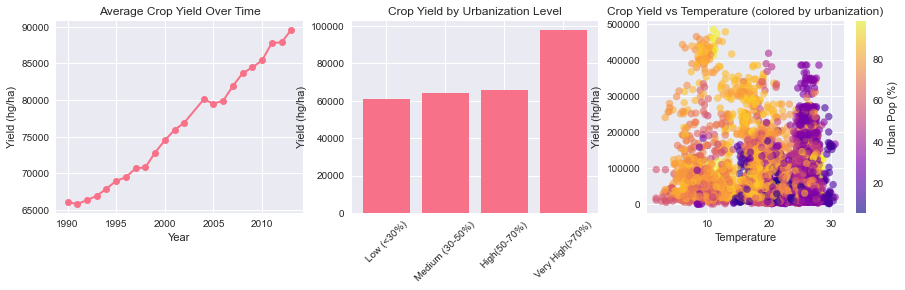

In [41]:
# Create figure with subplots 
fig = plt.figure(figsize=(15,12))

#1. Crop yield over time
ax1 = plt.subplot(3,3,1)
yearly_yield = df_features.groupby('year')['hg/ha_yield'].mean()
ax1.plot(yearly_yield.index, yearly_yield.values, marker='o',linewidth=2)
ax1.set_title("Average Crop Yield Over Time")
ax1.set_xlabel('Year')
ax1.set_ylabel("Yield (hg/ha)")
ax1.grid(True)

# 2. Yield by Urbanization Level
ax2 = plt.subplot(3,3,2)
yield_by_urban = df_features.groupby('urbanization_level')['hg/ha_yield'].mean().sort_index()
ax2.bar(yield_by_urban.index, yield_by_urban.values)
ax2.set_title("Crop Yield by Urbanization Level")
ax2.set_ylabel('Yield (hg/ha)')
ax2.tick_params(axis='x',rotation=45)

#3 Yeild vs Rainfall Scatter Plot
ax5 = plt.subplot(3,3,3)
scatter = ax5.scatter(sample_data['avg_temp'],
                     sample_data['hg/ha_yield'],
                     c=sample_data['urban_pop_perc'], cmap='plasma', alpha=0.6)
ax5.set_title("Crop Yield vs Temperature (colored by urbanization)")
ax5.set_xlabel('Temperature')
ax5.set_ylabel("Yield (hg/ha)")
ax5.grid(True)
plt.colorbar(scatter, ax=ax5, label='Urban Pop (%)')

### Crop yeilds have steadily increased over time, showing overall improvement in agricultural productivity over two decades. Regions witj very high urbanziation have the highest yields, where yields are lowest in areas witj low urbanization. This suggests strong agricultural productivity in more urbanized economies. There is no simple linear regression between rainfall and yield. However, points with hugher urbanization tend to achieve higher yields across varying rainfall levels, implying urbanization supports reselience to rainfall variation.

# 3. Correlation analysis
#### Analyze and visualize features relationship with crop yield

In [64]:
yield_corr = df_features.corr()['hg/ha_yield'].drop('hg/ha_yield').sort_values(ascending = False)
yield_corr

yield_per_rainfall               0.444856
internet_use_pop                 0.213265
gdp                              0.211078
urban_pop_perc                   0.185690
energy_kg_oil_eq_cap             0.165609
elect_access_pop                 0.153085
safe_sanitation_pop              0.151641
co2_emiss_excl_lulucf            0.147526
clean_fuel_tech_cook_pop         0.114684
basic_sanitation_pop             0.106633
year                             0.090759
pop_dens_sq_km                   0.088375
decade                           0.085678
pesticides_tonnes                0.069465
total_pop                        0.036354
urban_pop_change                 0.016343
average_rain_fall_mm_per_year    0.006400
avg_temp                        -0.113693
rural_pop_perc                  -0.185690
ren_energy_cons_perc            -0.193681
Name: hg/ha_yield, dtype: float64

<AxesSubplot:>

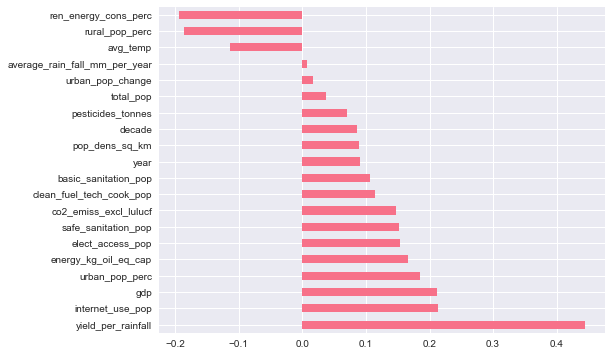

In [66]:
plt.figure(figsize=(8,6))
yield_corr.plot(kind='barh')

## Data Modeling / Prediction

### Create training and test sets for crop yield prediction

In [50]:
#Select features for modeling
modeling_features = [
    'year',
    'urban_pop_perc',
    'rural_pop_perc',
    'average_rain_fall_mm_per_year',
    'avg_temp',
    'pesticides_tonnes',
    'pop_dens_sq_km',
    'urban_pop_change'
]

#Create modeling dataset
modeling_data = df_features[modeling_features + ['hg/ha_yield']].copy()
modeling_data = modeling_data.dropna()

In [51]:
# Split features and target
X = modeling_data[modeling_features].dropna()
y= modeling_data['hg/ha_yield']


In [52]:
X.shape

(24820, 8)

In [53]:
y.shape

(24820,)

In [54]:
# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [61]:
# Train and Evaluate Predictive Models

models = {
    'LinearRegression' : LinearRegression(),
    'RandomForest' : RandomForestRegressor(n_estimators=100, random_state=42,n_jobs=-1)
    
}

# Store results
results = {}
predictions = {}

for name, model in models.items():
    
    #Train Model
    if 'Linear' in name:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    #Calculate metrics
    train_mse = mean_squared_error(y_train,y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train,y_train_pred)
    train_r2 = r2_score(y_train,y_train_pred)

    test_mse = mean_squared_error(y_test,y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test,y_test_pred)
    test_r2 = r2_score(y_test,y_test_pred)
    
    #Store
    results[name] = {
        'train_rmse': train_rmse,
        'train_mae': train_mae,
        'train_r2': train_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2
    }
    
    predictions[name] = {
        'y_test' : y_test,
        'y_pred' : y_test_pred
    }



In [60]:
# Create results comparison df

results_df= pd.DataFrame(results).T
results_df = results_df.round(4)


results_df

,train_rmse,train_mae,train_r2,test_rmse,test_mae,test_r2
LinearRegression,81154.6848,61987.9148,0.0659,82791.7657,62778.5154,0.0820
RandomForest,71528.9122,53133.3446,0.2744,94862.2197,69210.4696,-0.2052


### Final Conclusion : Urbanization & Climate Impact on Crop Yields
1. Urbanziationm matter more than climate
2. Country with higher urban population (%) consistently show higher crop yields, regardless of rainfall or temperatire Levels.
3. Rainfall and temperature still matter, but not decisive.
3. Over decades, both crop yield and urbanization increased all in parallels.

So, urbanziation has a stronger and more consistent positive association with crop yields compared to rainfall. Climate sets the baseline, but urbanization through modernization, infrastucture, is what really drives productivity differences across countries)